# Exploratory Data Analysis - Retail

### Objective:
- Perform Exploratory Data Analysis on dataset **SampleSuperstore**
- Try to find out the weak areas where we can work to make profit
- What all the business problems we can derive by exploring the data

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Data Analysis](#data_preparation)**
    - 3.1 - [Understand the Data](#Data_Understanding)
        - 3.1.1 - [Data Dimension](#Data_Shape)
        - 3.1.2 - [Data Types](#Data_Types)
        - 3.1.3 - [Summary Statistics](#Summary_Statistics)
        - 3.1.4 - [Missing Values](#Missing_Values)
        - 3.1.5 - [Correlation](#correlation)
    - 3.2 [Univariate Analysis](#univariate)
    - 3.3 [Bivariate Analysis](#bivariate)
    - 3.4 [Multivariate Analysis](#multi)

<a id="import_lib"></a>
### 1. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

<a id="Read_Data"></a>
### 2. Read the Data

In [2]:
df=pd.read_csv('SampleSuperstore.csv')
df.head() #print first 5 records

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## 3. Data Analysis

<a id='data_preparation'></a>
### 3.1 Understand the Data
<a id='Data_Shape'></a>
#### 3.1.1 Data dimension

In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**Inferences**
- This dataset has 9994 records and 13 columnns

<a id="Data_Types"></a>
### 3.1.2 Data Types

In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
df.select_dtypes(np.number).shape

(9994, 5)

In [7]:
df.select_dtypes(object).shape

(9994, 8)

**Inferences**
- There are 5 numerical and 8 categorical features

<a id="Summary_Statistics"></a>
### 3.1.3 Summary Statistics

In [8]:
#For Numerical Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [9]:
#For Categorical Data
df.describe(include=object)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


<a id="Missing_Values"></a>
### 3.1.4 Missing Values

In [10]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**Inferences**
- There are no missing values

<a id="correlation"></a>
### 3.1.5 Correlation

In [11]:
klib.corr_mat(df)

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.00,-0.02,0.01,0.06,-0.03
Sales,-0.02,1.00,0.20,-0.03,0.48
Quantity,0.01,0.20,1.00,0.01,0.07
Discount,0.06,-0.03,0.01,1.00,-0.22
Profit,-0.03,0.48,0.07,-0.22,1.00


**Inferences**
- **Sales** is positively correlated with **Profit**

<a id="univariate"></a>
### 3.2 Univariate Analysis

In [12]:
#defining a function to plot distribution plot and boxplot for numerical data and barplot and pie chart for categorical data
def plot(data,col,size):
    while col not in df.columns:# for prompting if column is not present in dataset
        print('Column not present in the Dataset')
        col=input('Please enter the column name: ')
        
    else:
        if data[col].dtypes==np.number or data[col].dtypes==int: #For numerical Data
            fig,axes=plt.subplots(1,2,figsize=size)
            print(f"Distribution of {col}:")
            sns.distplot(data[col],ax=axes[0],color='orange') #Distribution plot
            sns.boxplot(data[col],ax=axes[1]) #Box Plot
            plt.show()
            print('_'*120)
            
        elif data[col].dtypes==object or data[col].dtypes=='category': #For categorical Data
            print(f'Distribution of {col}:')
            fig,axes=plt.subplots(1,2,figsize=size)
            sns.countplot(data[col],palette='tab10',ax=axes[0])  #Bar Plot
            data[col].value_counts().plot(kind='pie',autopct='%.2f',ax=axes[1]) #Pie Chart
            plt.show()
            print('_'*120)

**First lets visualize the distribution of Numerical Data**

Distribution of Sales:


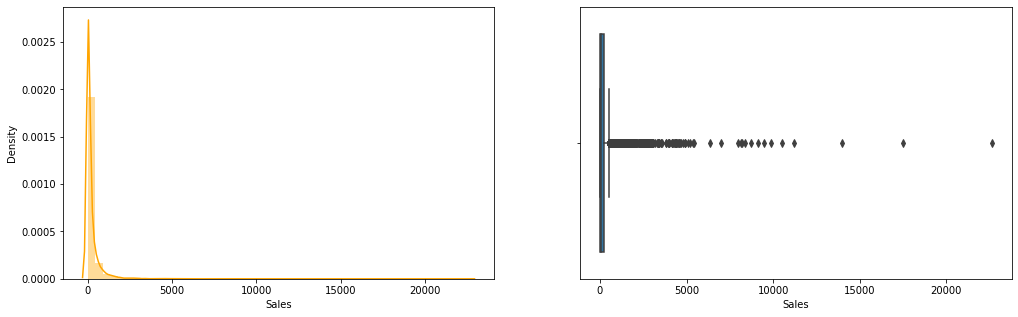

________________________________________________________________________________________________________________________
Distribution of Discount:


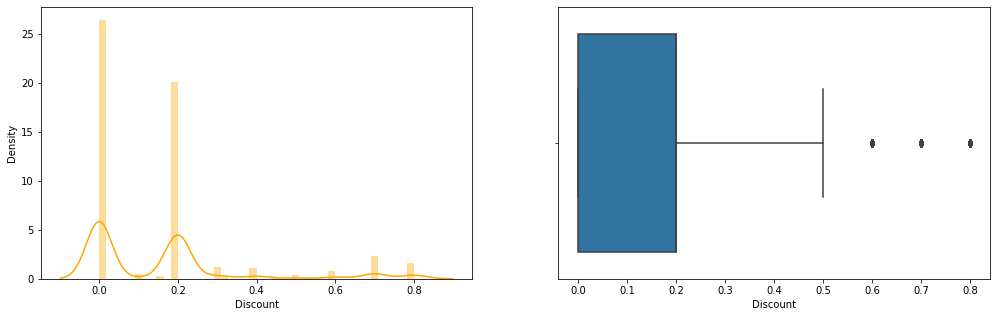

________________________________________________________________________________________________________________________
Distribution of Profit:


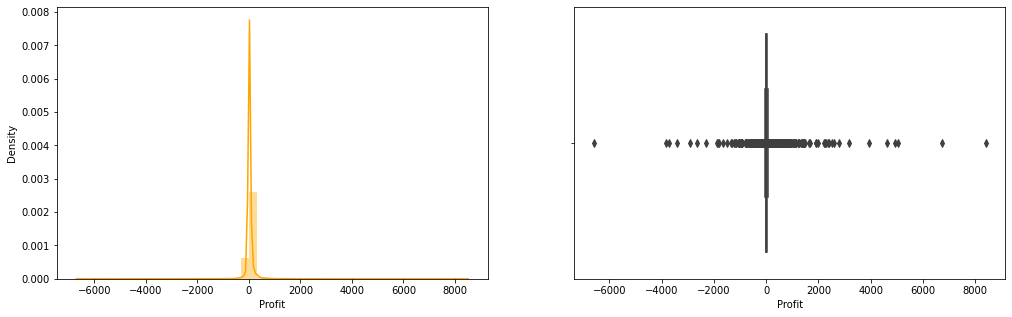

________________________________________________________________________________________________________________________


In [13]:
for col in df.select_dtypes(np.number):
    plot(df,col,(17,5))

**Now lets visualize the Categorical data**

In [14]:
df.select_dtypes(object).columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

Distribution of Ship Mode:


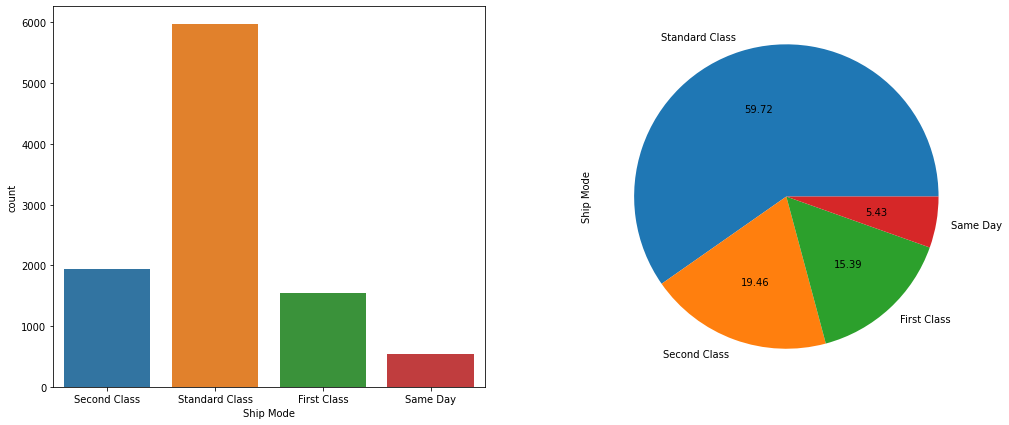

________________________________________________________________________________________________________________________


In [15]:
plot(df,'Ship Mode',(17,7))

Distribution of Segment:


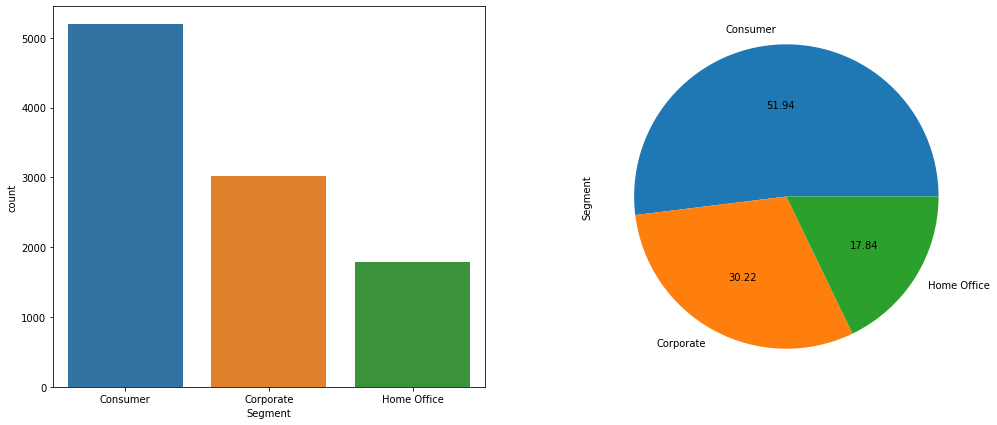

________________________________________________________________________________________________________________________


In [16]:
plot(df,'Segment',(17,7))

Distribution of Region:


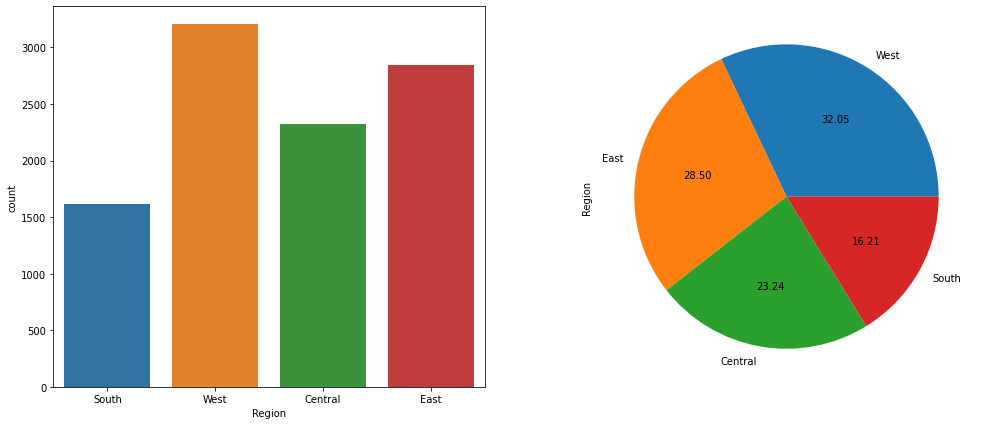

________________________________________________________________________________________________________________________


In [17]:
plot(df,'Region',(17,7))

Distribution of Category:


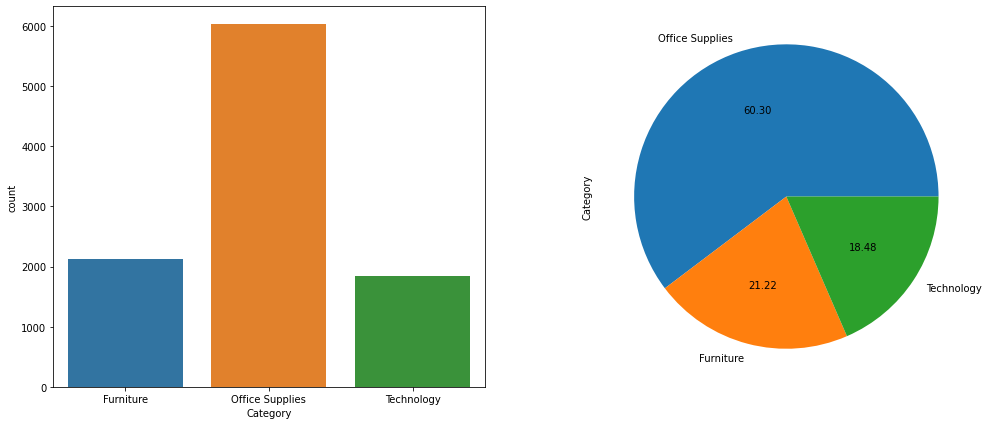

________________________________________________________________________________________________________________________


In [18]:
plot(df,'Category',(17,7))

Distribution of Sub-Category:


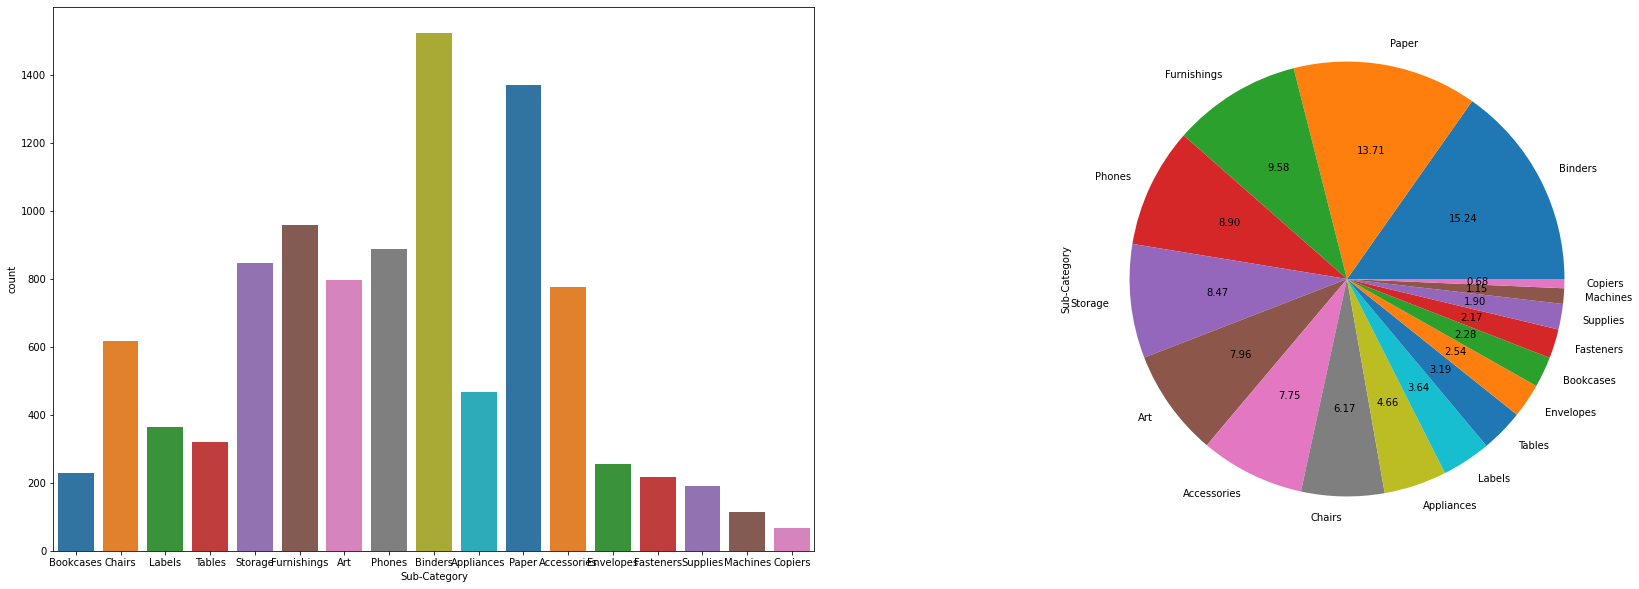

________________________________________________________________________________________________________________________


In [19]:
plot(df,'Sub-Category',(30,10))

In [20]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [21]:
df['City'].nunique()

531

In [22]:
df['State'].nunique()

49

### Inferences
**Sales data** is highly skewed towards right</p>

**Ship mode:** 
- Almost 60% of them are Standard Class
- 19.5% are Secon Class
- 15% are First class
- only 5.4% are Same Day

**Segment:**
- 51.9% of the segments are Consumer segments
- 30.2% are corporate segments
- 17.84% are Home office segments


**Category:**
- 60.3% are office supplies
- 21.2% are furniture
- 18.48% are Technology 

<a id="bivariate"></a>
### 3.3 Bivariate Analysis

<Figure size 504x432 with 0 Axes>

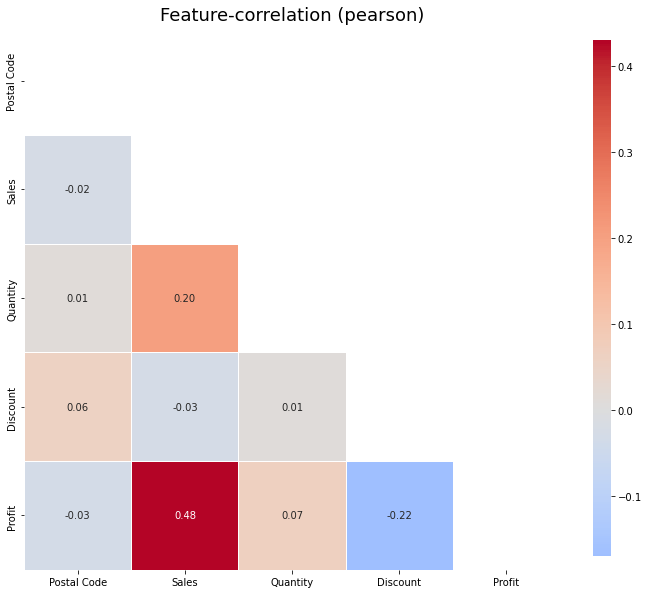

In [23]:
plt.figure(figsize=(7,6))
klib.corr_plot(df,cmap='coolwarm')
plt.show()

- Sales is positively correlated with Profit 

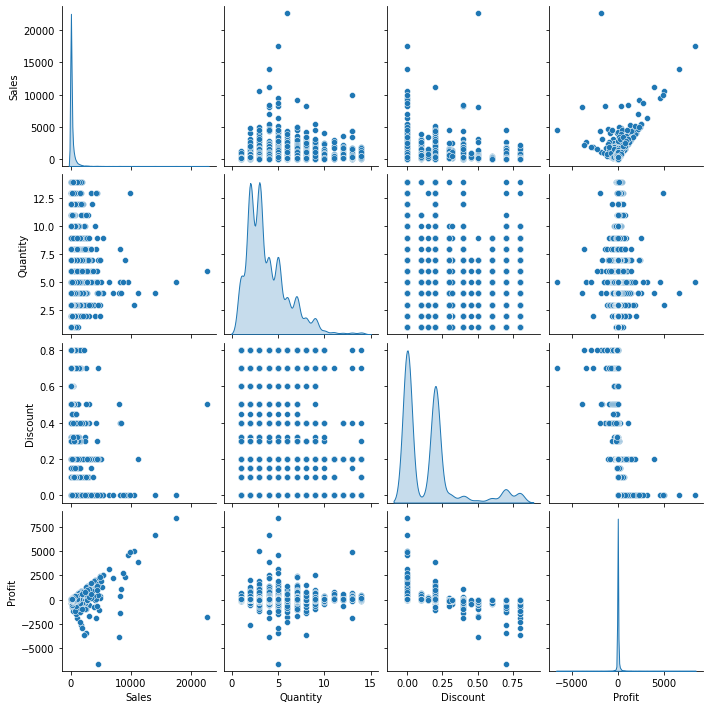

In [24]:
sns.pairplot(df.drop('Postal Code',axis=1),diag_kind='kde')
plt.show()

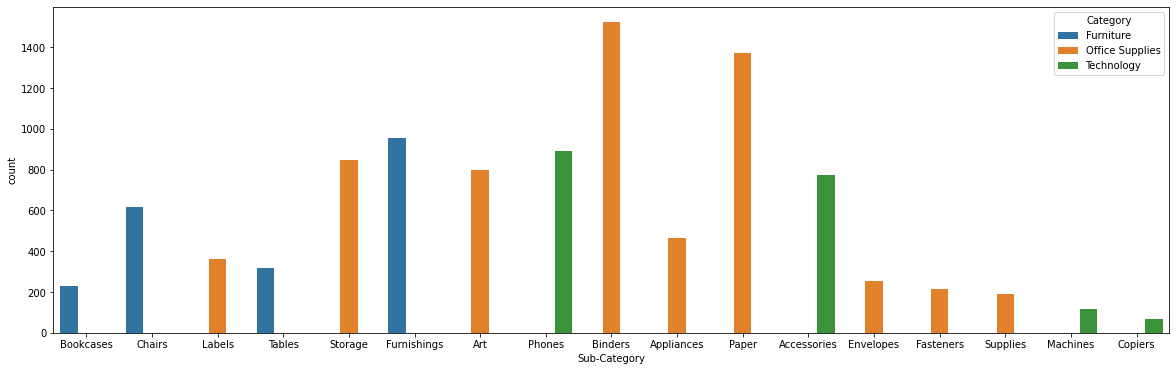

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x='Sub-Category',hue='Category',data=df)
plt.show()

In [26]:
import matplotlib.style
class style:
#These are the ANSI escape sequences to set Graphics in our output
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [40]:
#defining a function that can take both Numerical and categorical data, then plot different plots based on the datatype
def bi_plot(data,col1,size,col2='Profit',col3='Sales'):
    print(f'{style.BOLD}\tTotal Profit of {col1}: \t\t\t\t\t\t\t Total Sales of {col1}:')
    fig,axes=plt.subplots(1,2,figsize=size)
    sns.barplot(x=col1,y=col2,data=data,palette='tab10',estimator=sum,ax=axes[0])
    sns.barplot(x=col1,y=col3,data=data,palette='tab10',estimator=sum,ax=axes[1])
    plt.show()

	Total Profit of Ship Mode: 							 Total Sales of Ship Mode:


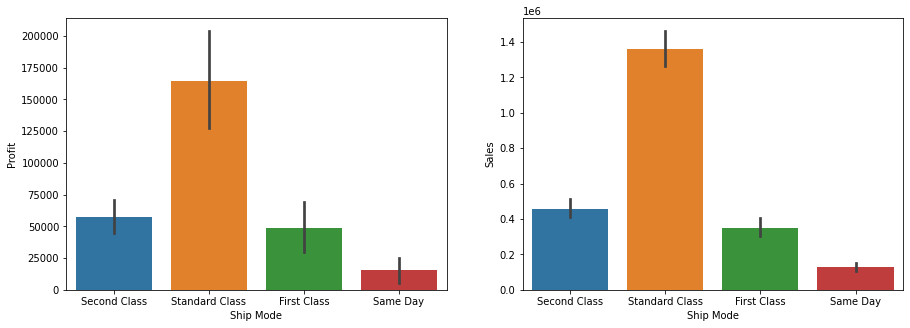

In [47]:
bi_plot(df,'Ship Mode',(15,5))

	Total Profit of Segment: 							 Total Sales of Segment:


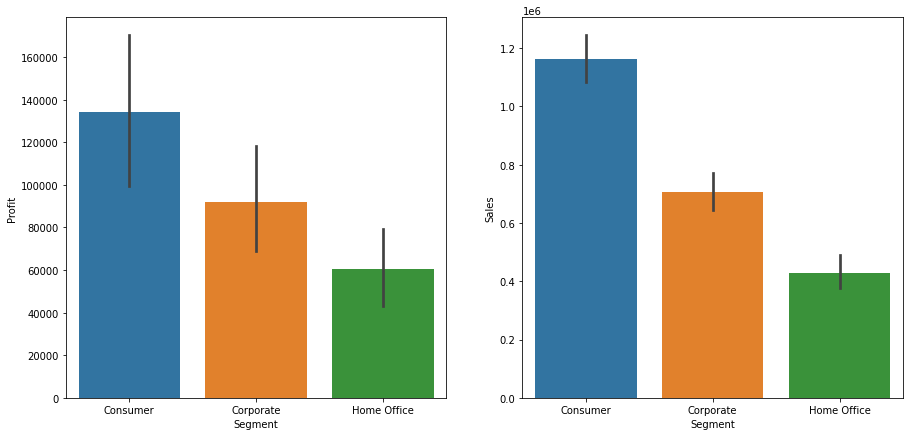

In [42]:
bi_plot(df,'Segment',(15,7))

	Total Profit of Region: 							 Total Sales of Region:


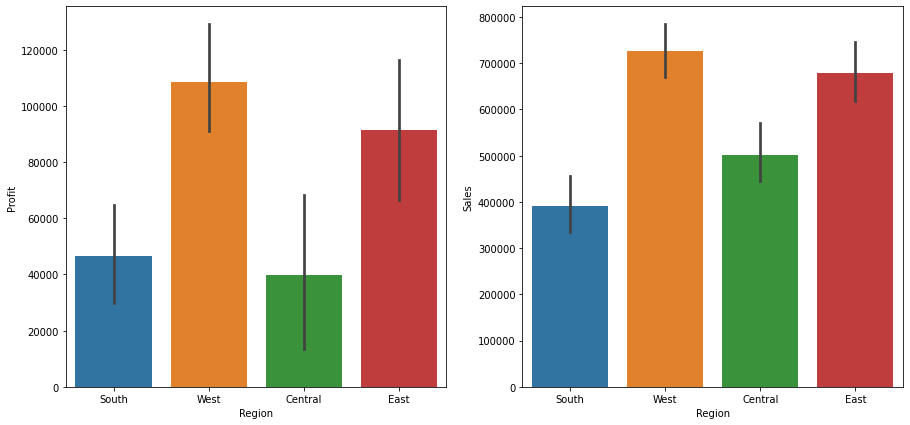

In [43]:
bi_plot(df,'Region',(15,7))

	Total Profit of Category: 							 Total Sales of Category:


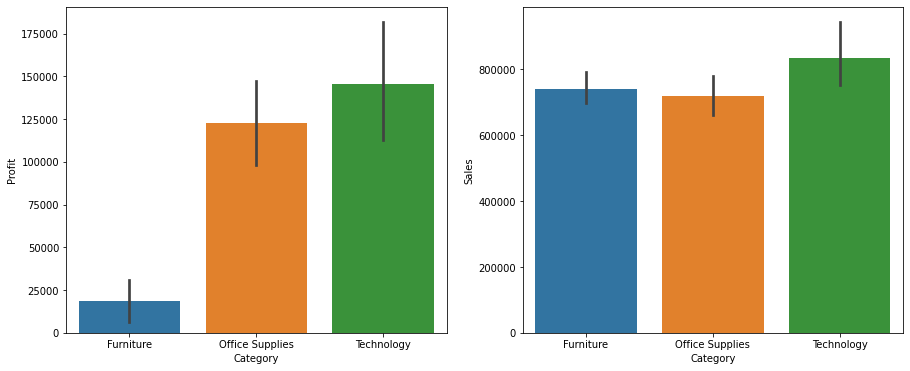

In [44]:
bi_plot(df,'Category',(15,6))

	Total Profit of Sub-Category: 							 Total Sales of Sub-Category:


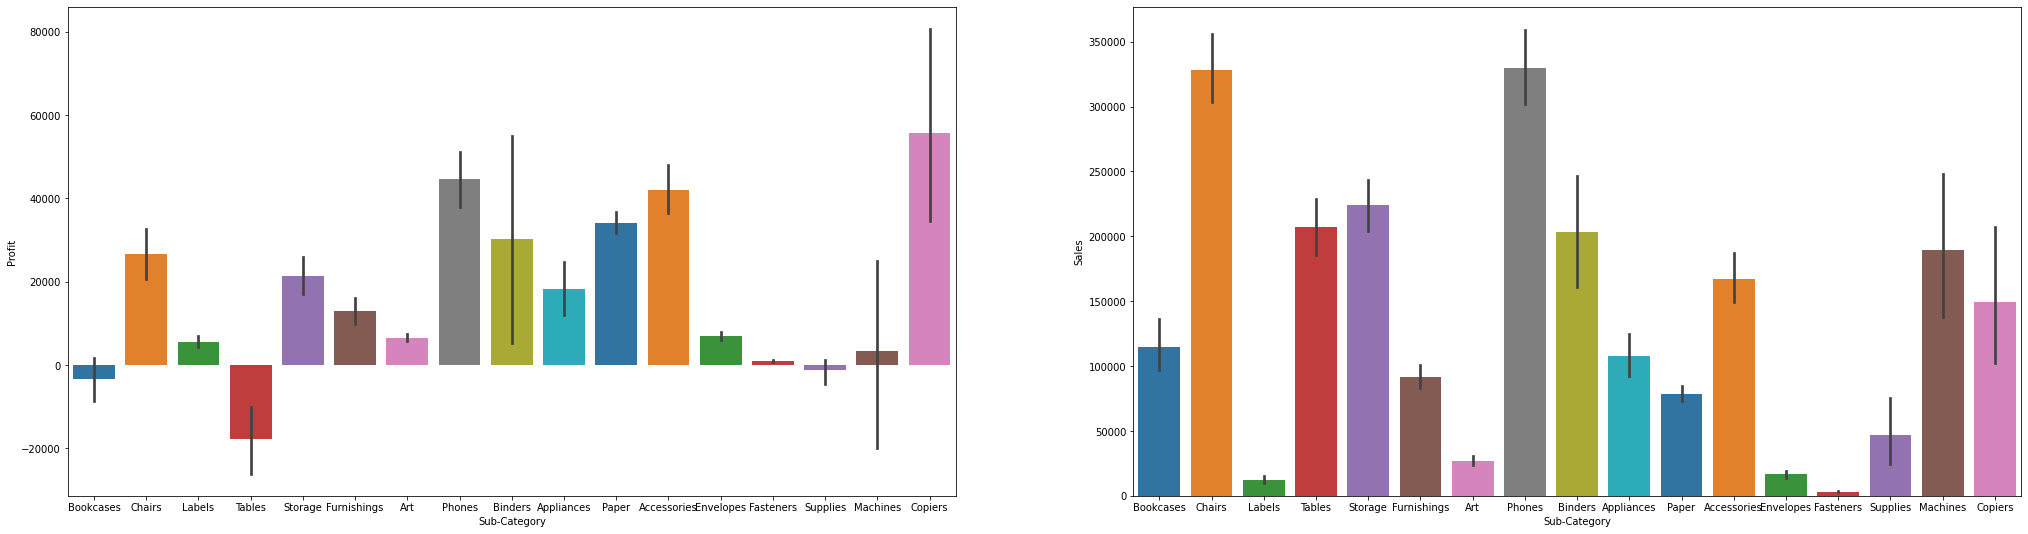

In [45]:
bi_plot(df,'Sub-Category',(35,9))

In [46]:
#lets get the top 15 cities of high profit
total_profitsales_of_City=df.groupby('City')['Profit','Sales'].sum()
total_profitsales_of_City_df=pd.DataFrame({'City':total_profitsales_of_City.index,'Total_Profit':total_profitsales_of_City.Profit,
                                     'total_sales':total_profitsales_of_City.Sales})

print(f"{style.BOLD}Top 15 Cities of high Profit")
top15_cities_profit=total_profitsales_of_City_df.nlargest(15,columns='Total_Profit').reset_index(drop=True)
display(top15_cities_profit)

Top 15 Cities of high Profit


,City,Total_Profit,total_sales
0,New York City,62036.9837,256368.161
1,Los Angeles,30440.7579,175851.341
2,Seattle,29156.0967,119540.742
3,San Francisco,17507.3854,112669.092
4,Detroit,13181.7908,42446.944
5,Lafayette,10018.3876,25036.200
6,Jackson,7581.6828,24963.858
7,Atlanta,6993.6629,17197.840
8,Minneapolis,6824.5846,16870.540
9,San Diego,6377.1960,47521.029


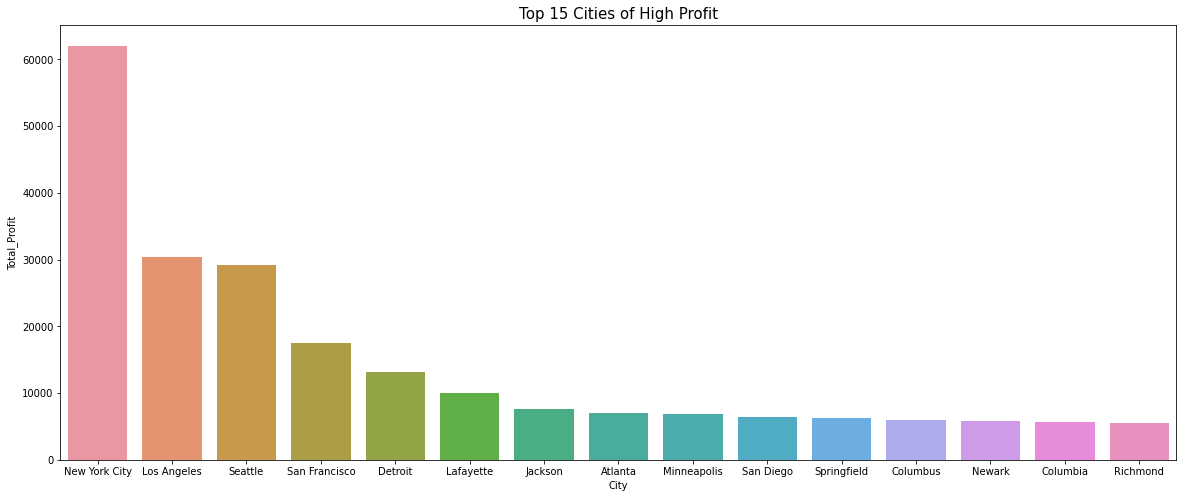

In [178]:
plt.figure(figsize=(20,8))
plt.title('Top 15 Cities of High Profit', fontsize=15)
sns.barplot(x='City',y='Total_Profit',data=top15_cities_profit)
plt.show()

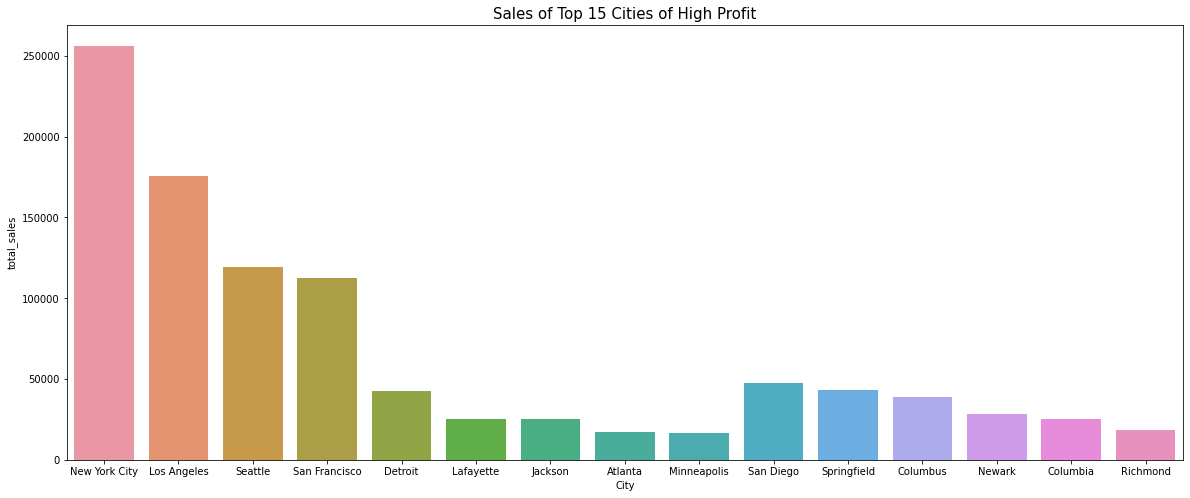

In [179]:
plt.figure(figsize=(20,8))
plt.title('Sales of Top 15 Cities of High Profit', fontsize=15)
sns.barplot(x='City',y='total_sales',data=top15_cities_profit)
plt.show()

In [171]:
#lets get the top 15 States of high profit
total_profit_in_states=df.groupby('State')['Profit','Sales'].sum()
total_profit_in_states_df=pd.DataFrame({'State':total_profit_in_states.index,'Total_Profit':total_profit_in_states.Profit,
                                        'total_sales':total_profit_in_states.Sales})

print(f"{style.BOLD}Top 15 States of high Profit")
top15_states_profit=total_profit_in_states_df.nlargest(15,columns='Total_Profit').reset_index(drop=True)
display(top15_states_profit)

Top 15 States of high Profit


,State,Total_Profit,total_sales
0,California,76381.3871,457687.6315
1,New York,74038.5486,310876.2710
2,Washington,33402.6517,138641.2700
3,Michigan,24463.1876,76269.6140
4,Virginia,18597.9504,70636.7200
5,Indiana,18382.9363,53555.3600
6,Georgia,16250.0433,49095.8400
7,Kentucky,11199.6966,36591.7500
8,Minnesota,10823.1874,29863.1500
9,Delaware,9977.3748,27451.0690


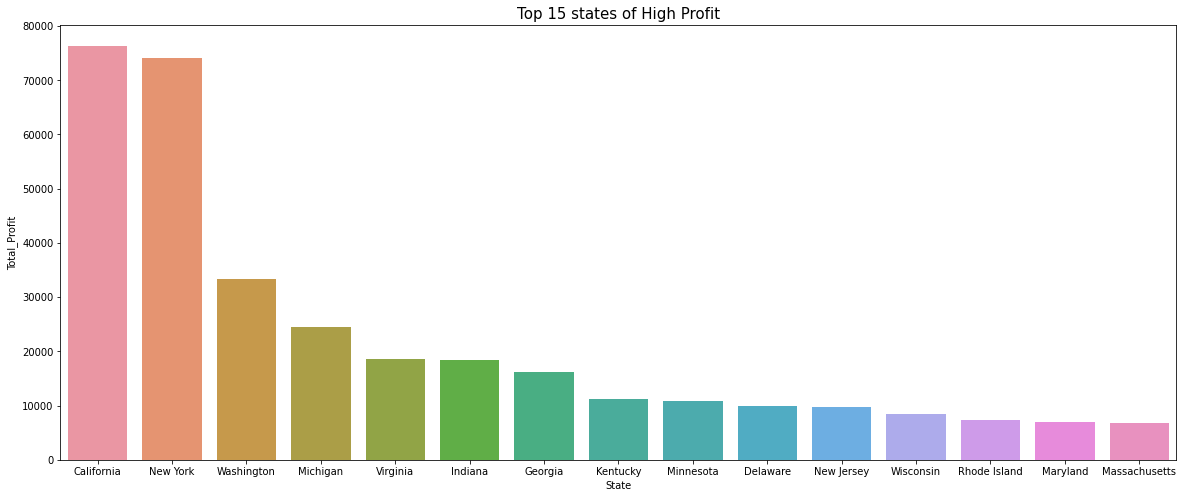

In [172]:
plt.figure(figsize=(20,8))
plt.title('Top 15 states of High Profit', fontsize=15)
sns.barplot(x='State',y='Total_Profit',data=top15_states_profit)
plt.show()

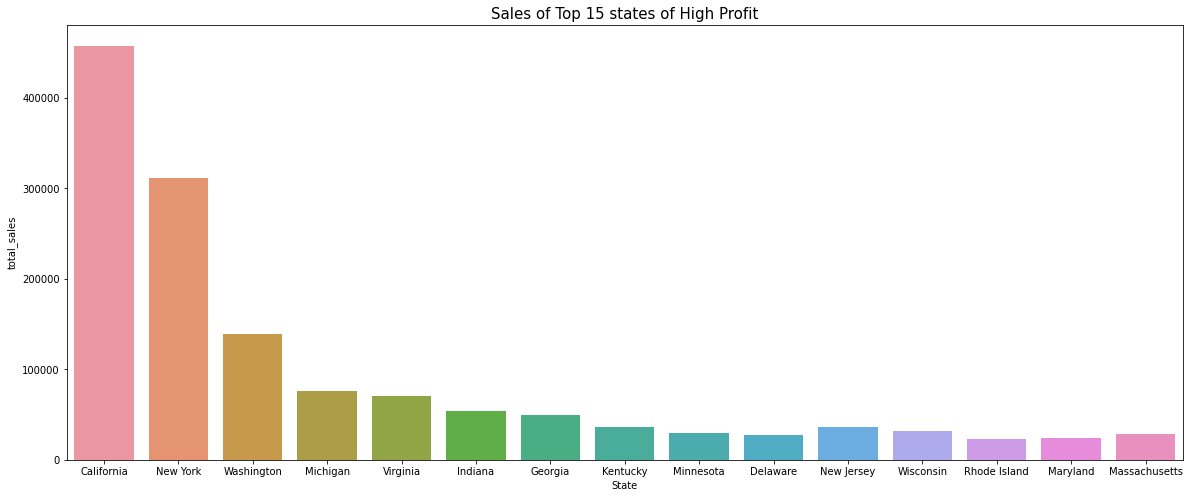

In [174]:
plt.figure(figsize=(20,8))
plt.title('Sales of Top 15 states of High Profit', fontsize=15)
sns.barplot(x='State',y='total_sales',data=top15_states_profit)
plt.show()

<a id="multi"></a>
### 3.4 Multivariate Analysis

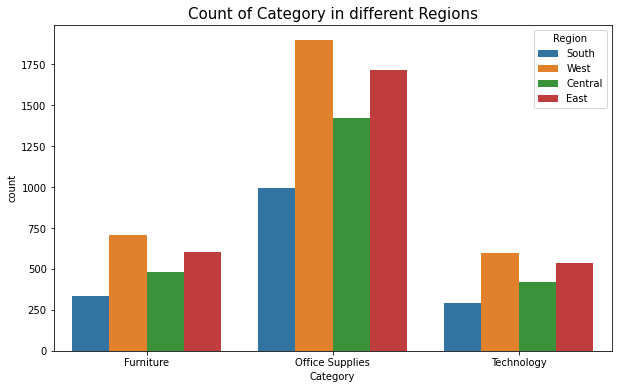

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(x='Category',hue='Region',data=df)
plt.title("Count of Category in different Regions",fontsize=15)
plt.show()

Total Profit and Sales of Category in different Regions


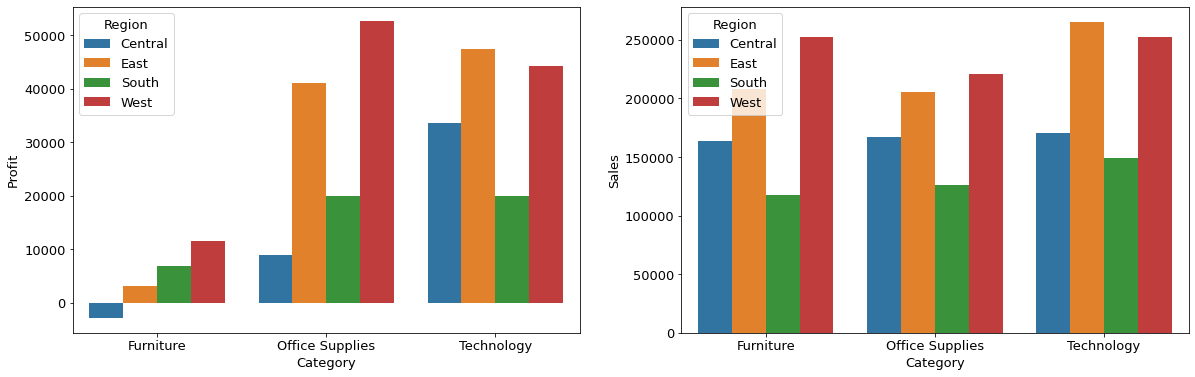

In [200]:
#Visualizing Sales and Profit in different regions
region_category_profitslaes=pd.pivot_table(index=['Region','Category'],values=['Profit','Sales'],data=df,aggfunc=sum).reset_index()
print(f"{style.BOLD}Total Profit and Sales of Category in different Regions")

fig,axes=plt.subplots(1,2,figsize=(20,6))
sns.barplot(x='Category',y='Profit',hue='Region',data=region_category_profitslaes,ax=axes[0])
sns.barplot(x='Category',y='Sales',hue='Region',data=region_category_profitslaes,ax=axes[1])
plt.show()

- **In central region the sales are good but the store is getting losses for selling Furnitures**
- **Also the Office supplies profit in central region is very less**

### Lets check the sub-category to know exactly what kind of furnitures are getting losses

Total Profit and Sales of Sub-Category


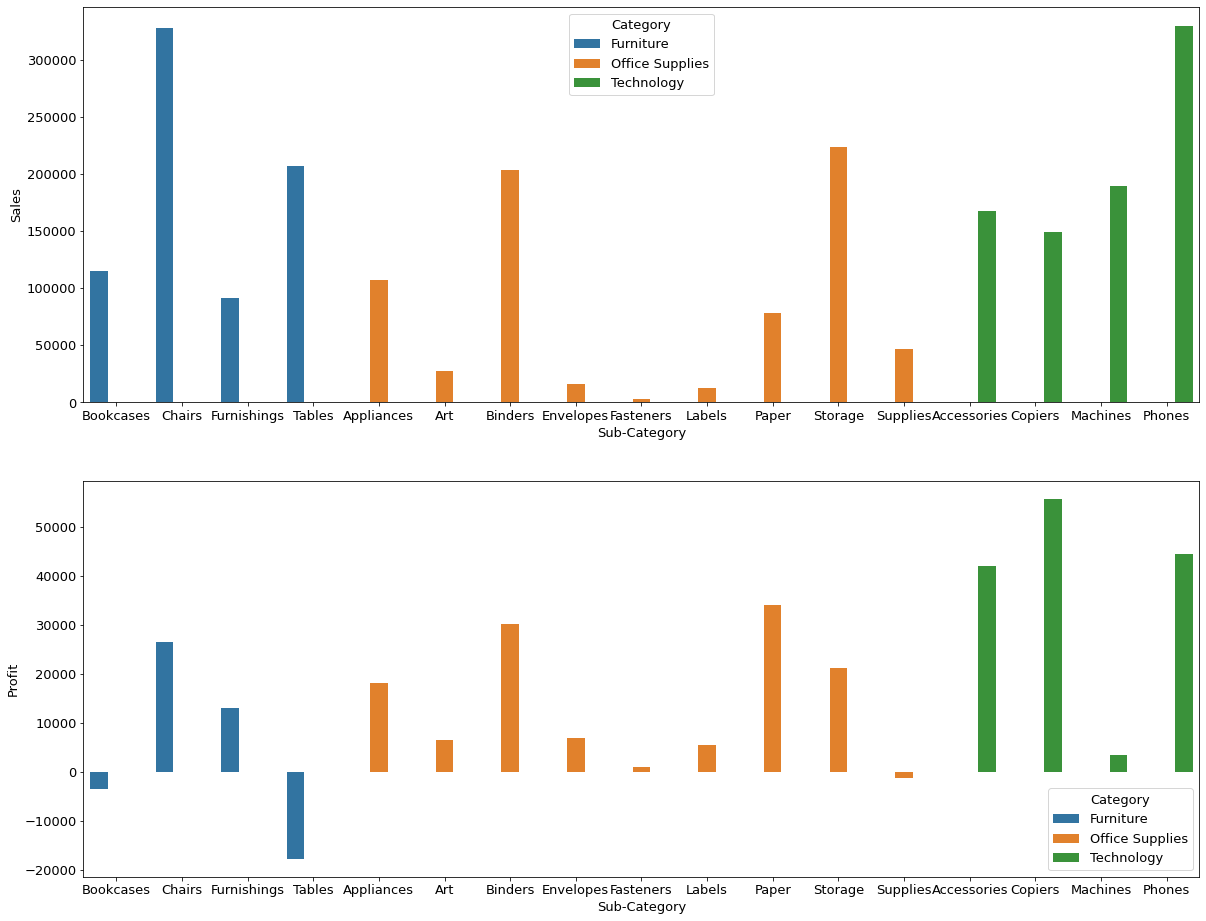

In [50]:
region_category_profitslaes=pd.pivot_table(index=['Category','Sub-Category'],values=['Profit','Sales'],
                                           data=df,aggfunc=sum).reset_index()

print(f"{style.BOLD}Total Profit and Sales of Sub-Category")

plt.rcParams.update({'font.size': 13})
fig,axes=plt.subplots(2,1,figsize=(20,16))
sns.barplot(x='Sub-Category',y='Profit',hue='Category',data=region_category_profitslaes,ax=axes[1])

sns.barplot(x='Sub-Category',y='Sales',hue='Category',data=region_category_profitslaes,ax=axes[0])
plt.show()

**From the above graph we can see that selling Sub-Category "Tables and Bookcases" are not getting us any profit, we are facing loss**

In [ ]:
#Let's see in which states we're getting losses

In [76]:
tables=df[df['Sub-Category']=='Tables']

states_tables_profit=pd.pivot_table(index='State',values='Profit',data=tables,
                                    aggfunc=sum).reset_index().sort_values(by='Profit',ascending=False)
states_tables_profit.rename(columns={'Profit':'Tables_Profit'},inplace=True)
states_tables_profit.head()

,State,Tables_Profit
35,Washington,4875.9900
34,Virginia,2538.6863
17,Michigan,1087.8775
27,Oklahoma,579.8830
0,Alabama,556.0730


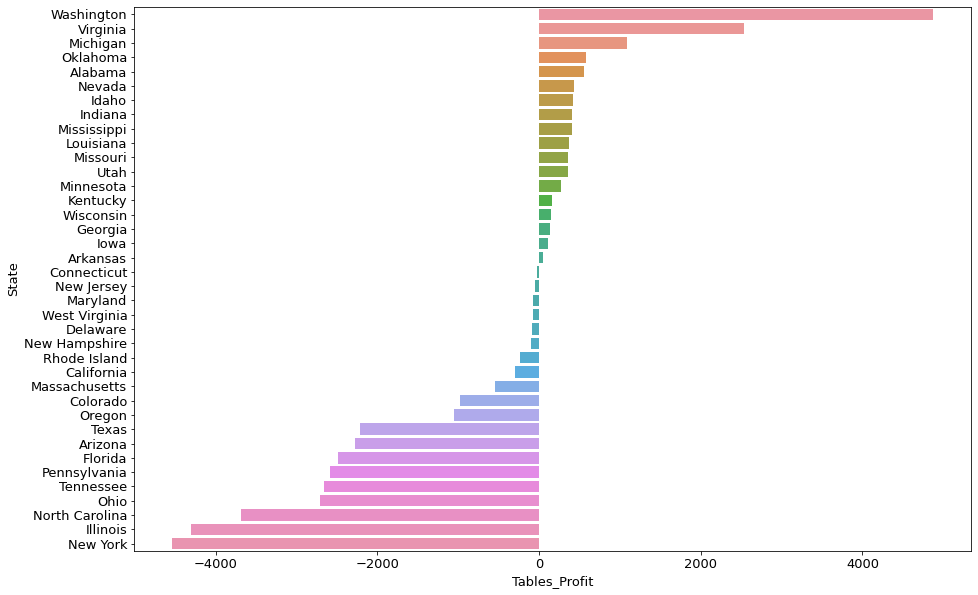

In [77]:
plt.figure(figsize=(15,10))
sns.barplot(x='Tables_Profit',y='State',data=states_tables_profit,orient='h')
plt.show()

In [78]:
bookcases=df[df['Sub-Category']=='Bookcases']

states_bookcases_profit=pd.pivot_table(index='State',values='Profit',data=tables,
                                    aggfunc=sum).reset_index().sort_values(by='Profit',ascending=False)
states_bookcases_profit.rename(columns={'Profit':'Bookcases_Profit'},inplace=True)
states_bookcases_profit.head()

,State,Bookcases_Profit
35,Washington,4875.9900
34,Virginia,2538.6863
17,Michigan,1087.8775
27,Oklahoma,579.8830
0,Alabama,556.0730


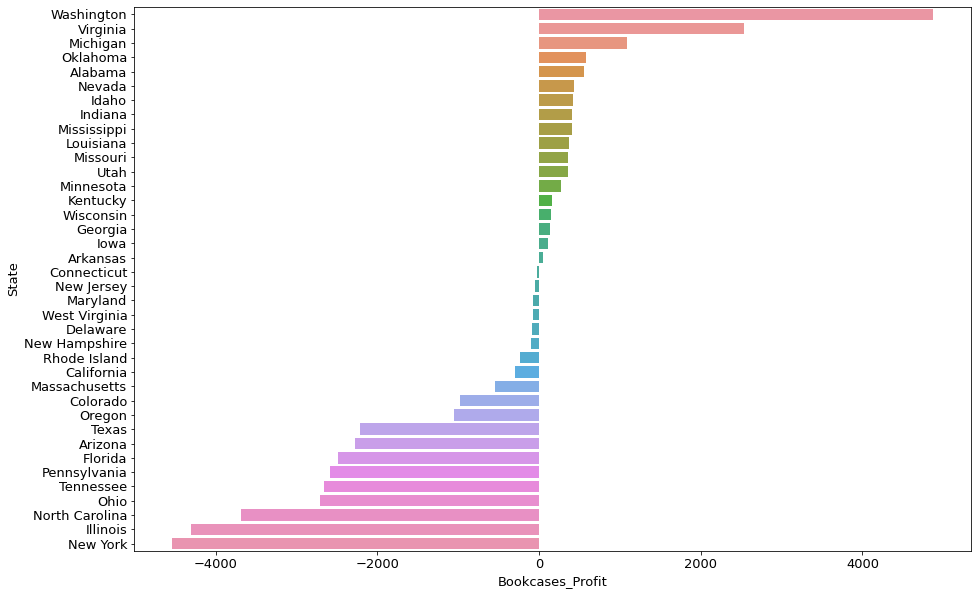

In [79]:
plt.figure(figsize=(15,10))
sns.barplot(x='Bookcases_Profit',y='State',data=states_bookcases_profit,orient='h')
plt.show()

### In the above graphs we can clearly see in which states we're not getting profits for selling Furnitures - "Tables and Bookcases"